In [ ]:
import pandas as pd

Björnåkerskolan_Fjv      = pd.read_csv('')
Bureskolan_bad_Fjv       = pd.read_csv('')
Bureskolan_Fjv           = pd.read_csv('')
Byskeskolan_bad_Fjv      = pd.read_csv('')
Byskeskolan_Fjv          = pd.read_csv('')
Byskeskolan_förskola_Fjv = pd.read_csv('')
Moröhöjdens_Fjv          = pd.read_csv('')
Norrbacka_Fjv            = pd.read_csv('')
Tallbacka_Fjv            = pd.read_csv('')

# Data cleaning 

## Björnåkerskolan

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Björnåkerskolan_Fjv['Period'] = pd.to_datetime(Björnåkerskolan_Fjv['Period'])
Björnåkerskolan_Fjv.set_index('Period', inplace=True)

# Check for missing values
Björnåkerskolan_Fjv.isna().sum()

# Remove Rows with Missing Values
Björnåkerskolan_Fjv = Björnåkerskolan_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Björnåkerskolan_Fjv.index.name = 'Period'

Björnåkerskolan_Fjv['day_of_year'] = Björnåkerskolan_Fjv.index.dayofyear
Björnåkerskolan_Fjv['month_of_year'] = Björnåkerskolan_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Björnåkerskolan_Fjv['day_of_year_sin'], Björnåkerskolan_Fjv['day_of_year_cos'] = encode_cyclical(Björnåkerskolan_Fjv['day_of_year'], 365)
Björnåkerskolan_Fjv['month_of_year_sin'], Björnåkerskolan_Fjv['month_of_year_cos'] = encode_cyclical(Björnåkerskolan_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Björnåkerskolan_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Björnåkerskolan_Fjv[Björnåkerskolan_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Björnåkerskolan_Fjv = Björnåkerskolan_Fjv[Björnåkerskolan_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Björnåkerskolan_Fjv['z_score'] = (Björnåkerskolan_Fjv['corrected_value'] - Björnåkerskolan_Fjv['corrected_value'].mean()) / Björnåkerskolan_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Björnåkerskolan_Fjv[abs(Björnåkerskolan_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Björnåkerskolan_Fjv = Björnåkerskolan_Fjv[abs(Björnåkerskolan_Fjv['z_score']) <= threshold]

Björnåkerskolan_Fjv

Number of outliers (excluding zeros): 35


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,6270f6c4a22623d7428818e8,22.7,4600,1.000000,22.7,-5.7,0.113393,2.903226,4078.392340,521.607660,4600.000000,4078.392340,31,1,0.017213,0.999852,0.500000,0.866025,0.507882
2012-01-02 00:00:00+00:00,6270f6c4a22623d7428818ea,18.2,4700,1.247253,22.7,-5.7,0.137573,2.903226,4053.408744,646.591256,5702.216448,5055.625191,31,1,0.034422,0.999407,0.500000,0.866025,1.029334
2012-01-05 00:00:00+00:00,6270f6c4a22623d7428818ee,22.5,4600,1.017778,22.9,-5.9,0.114286,2.903226,4074.285714,525.714286,4672.431746,4146.717460,31,1,0.085965,0.996298,0.500000,0.866025,0.542149
2012-01-06 00:00:00+00:00,6270f6c4a22623d7428818f0,24.8,4900,0.927419,23.0,-6.0,0.104797,2.903226,4386.492781,513.507219,4581.625524,4068.118305,31,1,0.103102,0.994671,0.500000,0.866025,0.499189
2012-01-07 00:00:00+00:00,6270f6c4a22623d7428818f2,21.2,4500,1.089623,23.1,-6.1,0.120450,2.903226,3957.976445,542.023555,4854.724304,4312.700749,31,1,0.120208,0.992749,0.500000,0.866025,0.628391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4d21a688ccccc4c34167,12.1,4200,1.297521,15.7,1.4,0.193507,2.903226,3387.271555,812.728445,5207.783272,4395.054827,31,10,-0.891981,0.452072,-0.866025,0.500000,0.795421
2022-10-29 00:00:00+00:00,636a4d21a688ccccc4c34169,12.2,3100,1.295082,15.8,1.2,0.192226,2.903226,2504.100812,595.899188,3838.914994,3243.015805,31,10,-0.884068,0.467359,-0.866025,0.500000,0.147818
2022-10-30 00:00:00+00:00,636a4d21a688ccccc4c3416b,13.9,3900,1.151079,16.0,1.0,0.172778,2.903226,3226.166251,673.833749,4387.406412,3713.572663,31,10,-0.875892,0.482508,-0.866025,0.500000,0.407306


## Bureskolan Bad

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Bureskolan_bad_Fjv['Period'] = pd.to_datetime(Bureskolan_bad_Fjv['Period'])
Bureskolan_bad_Fjv.set_index('Period', inplace=True)

# Check for missing values
Bureskolan_bad_Fjv.isna().sum()

# Remove Rows with Missing Values
Bureskolan_bad_Fjv = Bureskolan_bad_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Bureskolan_bad_Fjv.index.name = 'Period'

Bureskolan_bad_Fjv['day_of_year'] = Bureskolan_bad_Fjv.index.dayofyear
Bureskolan_bad_Fjv['month_of_year'] = Bureskolan_bad_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Bureskolan_bad_Fjv['day_of_year_sin'], Bureskolan_bad_Fjv['day_of_year_cos'] = encode_cyclical(Bureskolan_bad_Fjv['day_of_year'], 365)
Bureskolan_bad_Fjv['month_of_year_sin'], Bureskolan_bad_Fjv['month_of_year_cos'] = encode_cyclical(Bureskolan_bad_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Bureskolan_bad_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Bureskolan_bad_Fjv[Bureskolan_bad_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Bureskolan_bad_Fjv = Bureskolan_bad_Fjv[Bureskolan_bad_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Bureskolan_bad_Fjv['z_score'] = (Bureskolan_bad_Fjv['corrected_value'] - Bureskolan_bad_Fjv['corrected_value'].mean()) / Bureskolan_bad_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Bureskolan_bad_Fjv[abs(Bureskolan_bad_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Bureskolan_bad_Fjv = Bureskolan_bad_Fjv[abs(Bureskolan_bad_Fjv['z_score']) <= threshold]

Bureskolan_bad_Fjv
#Bureskolan_bad_Fjv.describe()

Number of outliers (excluding zeros): 38


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,6270f74ba22623d74288353d,22.7,2571,1.000000,22.7,-5.7,0.113393,2.903226,2279.466675,291.533325,2571.000000,2279.466675,31,1,0.017213,0.999852,0.500000,0.866025,0.626217
2012-01-02 00:00:00+00:00,6270f74ba22623d74288353f,18.2,2809,1.247253,22.7,-5.7,0.137573,2.903226,2422.558545,386.441455,3407.984256,3021.542800,31,1,0.034422,0.999407,0.500000,0.866025,1.369000
2012-01-05 00:00:00+00:00,6270f74ba22623d742883543,22.5,2890,1.017778,22.9,-5.9,0.114286,2.903226,2559.714286,330.285714,2935.506032,2605.220317,31,1,0.085965,0.996298,0.500000,0.866025,0.949698
2012-01-06 00:00:00+00:00,6270f74ba22623d742883545,24.8,2838,0.927419,23.0,-6.0,0.104797,2.903226,2540.585002,297.414998,2653.602701,2356.187704,31,1,0.103102,0.994671,0.500000,0.866025,0.699523
2012-01-07 00:00:00+00:00,6270f74ba22623d742883547,21.2,2869,1.089623,23.1,-6.1,0.120450,2.903226,2523.429872,345.570128,3095.156451,2749.586322,31,1,0.120208,0.992749,0.500000,0.866025,1.091380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4d26a688ccccc4c342b0,12.1,1290,1.297521,15.7,1.4,0.193507,2.903226,1040.376263,249.623737,1599.533434,1349.909697,31,10,-0.891981,0.452072,-0.866025,0.500000,-0.235912
2022-10-29 00:00:00+00:00,636a4d27a688ccccc4c342b2,12.2,1330,1.295082,15.8,1.2,0.192226,2.903226,1074.340026,255.659974,1647.018368,1391.358394,31,10,-0.884068,0.467359,-0.866025,0.500000,-0.193772
2022-10-30 00:00:00+00:00,636a4d27a688ccccc4c342b4,13.9,1330,1.151079,16.0,1.0,0.172778,2.903226,1100.205414,229.794586,1496.218084,1266.423498,31,10,-0.875892,0.482508,-0.866025,0.500000,-0.327600


## Bureskolan

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Bureskolan_Fjv['Period'] = pd.to_datetime(Bureskolan_Fjv['Period'])
Bureskolan_Fjv.set_index('Period', inplace=True)

# Check for missing values
Bureskolan_Fjv.isna().sum()

# Remove Rows with Missing Values
Bureskolan_Fjv = Bureskolan_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Bureskolan_Fjv.index.name = 'Period'

Bureskolan_Fjv['day_of_year'] = Bureskolan_Fjv.index.dayofyear
Bureskolan_Fjv['month_of_year'] = Bureskolan_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Bureskolan_Fjv['day_of_year_sin'], Bureskolan_Fjv['day_of_year_cos'] = encode_cyclical(Bureskolan_Fjv['day_of_year'], 365)
Bureskolan_Fjv['month_of_year_sin'], Bureskolan_Fjv['month_of_year_cos'] = encode_cyclical(Bureskolan_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Bureskolan_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Bureskolan_Fjv[Bureskolan_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Bureskolan_Fjv = Bureskolan_Fjv[Bureskolan_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Bureskolan_Fjv['z_score'] = (Bureskolan_Fjv['corrected_value'] - Bureskolan_Fjv['corrected_value'].mean()) / Bureskolan_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Bureskolan_Fjv[abs(Bureskolan_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Bureskolan_Fjv = Bureskolan_Fjv[abs(Bureskolan_Fjv['z_score']) <= threshold]

Bureskolan_Fjv
#Bureskolan_Fjv.describe()

Number of outliers (excluding zeros): 43


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,6270f639a22623d74287fe76,22.7,3930,1.000000,22.7,-5.7,0.113393,2.903226,3484.365629,445.634371,3930.000000,3484.365629,31,1,0.017213,0.999852,0.500000,0.866025,0.813181
2012-01-02 00:00:00+00:00,6270f639a22623d74287fe78,18.2,4100,1.247253,22.7,-5.7,0.137573,2.903226,3535.952308,564.047692,4974.273922,4410.226231,31,1,0.034422,0.999407,0.500000,0.866025,1.411616
2012-01-05 00:00:00+00:00,6270f639a22623d74287fe7c,22.5,4360,1.017778,22.9,-5.9,0.114286,2.903226,3861.714286,498.285714,4428.652698,3930.366984,31,1,0.085965,0.996298,0.500000,0.866025,1.098940
2012-01-06 00:00:00+00:00,6270f639a22623d74287fe7e,24.8,4700,0.927419,23.0,-6.0,0.104797,2.903226,4207.452259,492.547741,4394.620401,3902.072660,31,1,0.103102,0.994671,0.500000,0.866025,1.079438
2012-01-07 00:00:00+00:00,6270f639a22623d74287fe80,21.2,3440,1.089623,23.1,-6.1,0.120450,2.903226,3025.653105,414.346895,3711.167024,3296.820128,31,1,0.120208,0.992749,0.500000,0.866025,0.687776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4d1ca688ccccc4c3401c,12.1,2000,1.297521,15.7,1.4,0.193507,2.903226,1612.986455,387.013545,2479.896796,2092.883251,31,10,-0.891981,0.452072,-0.866025,0.500000,-0.017820
2022-10-29 00:00:00+00:00,636a4d1ca688ccccc4c3401e,12.2,1950,1.295082,15.8,1.2,0.192226,2.903226,1575.160188,374.839812,2414.801367,2039.961555,31,10,-0.884068,0.467359,-0.866025,0.500000,-0.055124
2022-10-30 00:00:00+00:00,636a4d1ca688ccccc4c34020,13.9,2440,1.151079,16.0,1.0,0.172778,2.903226,2018.421962,421.578038,2744.941447,2323.363409,31,10,-0.875892,0.482508,-0.866025,0.500000,0.134067


## Byskeskolan Bad

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Byskeskolan_bad_Fjv['Period'] = pd.to_datetime(Byskeskolan_bad_Fjv['Period'])
Byskeskolan_bad_Fjv.set_index('Period', inplace=True)

# Check for missing values
Byskeskolan_bad_Fjv.isna().sum()

# Remove Rows with Missing Values
Byskeskolan_bad_Fjv = Byskeskolan_bad_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Byskeskolan_bad_Fjv.index.name = 'Period'

# Assuming 'day_of_year' and 'month_of_year' are not already columns in your DataFrame
Byskeskolan_bad_Fjv['day_of_year'] = Byskeskolan_bad_Fjv.index.dayofyear
Byskeskolan_bad_Fjv['month_of_year'] = Byskeskolan_bad_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Byskeskolan_bad_Fjv['day_of_year_sin'], Byskeskolan_bad_Fjv['day_of_year_cos'] = encode_cyclical(Byskeskolan_bad_Fjv['day_of_year'], 365)
Byskeskolan_bad_Fjv['month_of_year_sin'], Byskeskolan_bad_Fjv['month_of_year_cos'] = encode_cyclical(Byskeskolan_bad_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Byskeskolan_bad_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Byskeskolan_bad_Fjv[Byskeskolan_bad_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Byskeskolan_bad_Fjv = Byskeskolan_bad_Fjv[Byskeskolan_bad_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Byskeskolan_bad_Fjv['z_score'] = (Byskeskolan_bad_Fjv['corrected_value'] - Byskeskolan_bad_Fjv['corrected_value'].mean()) / Byskeskolan_bad_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Byskeskolan_bad_Fjv[abs(Byskeskolan_bad_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Byskeskolan_bad_Fjv = Byskeskolan_bad_Fjv[abs(Byskeskolan_bad_Fjv['z_score']) <= threshold]

#Byskeskolan_bad_Fjv.describe()
Byskeskolan_bad_Fjv

Number of outliers (excluding zeros): 44


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,6270f7d0a22623d742884ff6,22.7,1700,1.000000,22.7,-5.7,0.113393,2.903226,1507.231952,192.768048,1700.000000,1507.231952,31,1,0.017213,0.999852,0.500000,0.866025,0.396307
2012-01-02 00:00:00+00:00,6270f7d1a22623d742884ff8,18.2,1950,1.247253,22.7,-5.7,0.137573,2.903226,1681.733415,268.266585,2365.813207,2097.546622,31,1,0.034422,0.999407,0.500000,0.866025,1.234854
2012-01-05 00:00:00+00:00,6270f7d1a22623d742884ffc,22.5,1970,1.017778,22.9,-5.9,0.114286,2.903226,1744.857143,225.142857,2001.019683,1775.876825,31,1,0.085965,0.996298,0.500000,0.866025,0.775421
2012-01-06 00:00:00+00:00,6270f7d1a22623d742884ffe,24.8,1840,0.927419,23.0,-6.0,0.104797,2.903226,1647.172799,192.827201,1720.447136,1527.619935,31,1,0.103102,0.994671,0.500000,0.866025,0.422059
2012-01-07 00:00:00+00:00,6270f7d1a22623d742885000,21.2,1980,1.089623,23.1,-6.1,0.120450,2.903226,1741.509636,238.490364,2136.078694,1897.588330,31,1,0.120208,0.992749,0.500000,0.866025,0.945519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4d2ca688ccccc4c343fd,12.1,1340,1.297521,15.7,1.4,0.193507,2.903226,1080.700925,259.299075,1661.530854,1402.231778,31,10,-0.891981,0.452072,-0.866025,0.500000,0.347858
2022-10-29 00:00:00+00:00,636a4d2ca688ccccc4c343ff,12.2,1210,1.295082,15.8,1.2,0.192226,2.903226,977.407091,232.592909,1498.415207,1265.822298,31,10,-0.884068,0.467359,-0.866025,0.500000,0.142424
2022-10-30 00:00:00+00:00,636a4d2ca688ccccc4c34401,13.9,1330,1.151079,16.0,1.0,0.172778,2.903226,1100.205414,229.794586,1496.218084,1266.423498,31,10,-0.875892,0.482508,-0.866025,0.500000,0.139657


## Byskeskolan

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Byskeskolan_Fjv['Period'] = pd.to_datetime(Byskeskolan_Fjv['Period'])
Byskeskolan_Fjv.set_index('Period', inplace=True)

# Check for missing values
Byskeskolan_Fjv.isna().sum()

# Remove Rows with Missing Values
Byskeskolan_Fjv = Byskeskolan_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Byskeskolan_Fjv.index.name = 'Period'

Byskeskolan_Fjv['day_of_year'] = Byskeskolan_Fjv.index.dayofyear
Byskeskolan_Fjv['month_of_year'] = Byskeskolan_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Byskeskolan_Fjv['day_of_year_sin'], Byskeskolan_Fjv['day_of_year_cos'] = encode_cyclical(Byskeskolan_Fjv['day_of_year'], 365)
Byskeskolan_Fjv['month_of_year_sin'], Byskeskolan_Fjv['month_of_year_cos'] = encode_cyclical(Byskeskolan_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Byskeskolan_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)


# Identifying rows with 0 values
zero_values = Byskeskolan_Fjv[Byskeskolan_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Byskeskolan_Fjv = Byskeskolan_Fjv[Byskeskolan_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Byskeskolan_Fjv['z_score'] = (Byskeskolan_Fjv['corrected_value'] - Byskeskolan_Fjv['corrected_value'].mean()) / Byskeskolan_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Byskeskolan_Fjv[abs(Byskeskolan_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Byskeskolan_Fjv = Byskeskolan_Fjv[abs(Byskeskolan_Fjv['z_score']) <= threshold]

#Byskeskolan_Fjv.describe()
Byskeskolan_Fjv

Number of outliers (excluding zeros): 64


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,6270f5bca22623d74287e4f5,22.7,3130,1.000000,22.7,-5.7,0.113393,2.903226,2775.080005,354.919995,3130.000000,2775.080005,31,1,0.017213,0.999852,0.500000,0.866025,0.182303
2012-01-02 00:00:00+00:00,6270f5bca22623d74287e4f7,18.2,3480,1.247253,22.7,-5.7,0.137573,2.903226,3001.247325,478.752675,4222.066646,3743.313971,31,1,0.034422,0.999407,0.500000,0.866025,0.725165
2012-01-05 00:00:00+00:00,6270f5bca22623d74287e4fb,22.5,3850,1.017778,22.9,-5.9,0.114286,2.903226,3410.000000,440.000000,3910.622222,3470.622222,31,1,0.085965,0.996298,0.500000,0.866025,0.570348
2012-01-06 00:00:00+00:00,6270f5bca22623d74287e4fd,24.8,3730,0.927419,23.0,-6.0,0.104797,2.903226,3339.105729,390.894271,3487.645552,3096.751281,31,1,0.103102,0.994671,0.500000,0.866025,0.360088
2012-01-07 00:00:00+00:00,6270f5bca22623d74287e4ff,21.2,2980,1.089623,23.1,-6.1,0.120450,2.903226,2621.059957,358.940043,3214.906317,2855.966274,31,1,0.120208,0.992749,0.500000,0.866025,0.224510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4d17a688ccccc4c33ed6,12.1,2420,1.297521,15.7,1.4,0.193507,2.903226,1951.713610,468.286390,3000.675124,2532.388734,31,10,-0.891981,0.452072,-0.866025,0.500000,0.118017
2022-10-29 00:00:00+00:00,636a4d17a688ccccc4c33ed8,12.2,1810,1.295082,15.8,1.2,0.192226,2.903226,1462.071764,347.928236,2241.431012,1893.502777,31,10,-0.884068,0.467359,-0.866025,0.500000,-0.259401
2022-10-30 00:00:00+00:00,636a4d17a688ccccc4c33eda,13.9,2090,1.151079,16.0,1.0,0.172778,2.903226,1728.894222,361.105778,2351.199846,1990.094068,31,10,-0.875892,0.482508,-0.866025,0.500000,-0.204835


## Byskeskolan förskola

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Byskeskolan_förskola_Fjv['Period'] = pd.to_datetime(Byskeskolan_förskola_Fjv['Period'])
Byskeskolan_förskola_Fjv.set_index('Period', inplace=True)

# Check for missing values
Byskeskolan_förskola_Fjv.isna().sum()

# Remove Rows with Missing Values
Byskeskolan_förskola_Fjv = Byskeskolan_förskola_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Byskeskolan_förskola_Fjv.index.name = 'Period'

Byskeskolan_förskola_Fjv['day_of_year'] = Byskeskolan_förskola_Fjv.index.dayofyear
Byskeskolan_förskola_Fjv['month_of_year'] = Byskeskolan_förskola_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Byskeskolan_förskola_Fjv['day_of_year_sin'], Byskeskolan_förskola_Fjv['day_of_year_cos'] = encode_cyclical(Byskeskolan_förskola_Fjv['day_of_year'], 365)
Byskeskolan_förskola_Fjv['month_of_year_sin'], Byskeskolan_förskola_Fjv['month_of_year_cos'] = encode_cyclical(Byskeskolan_förskola_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Byskeskolan_förskola_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Byskeskolan_förskola_Fjv[Byskeskolan_förskola_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Byskeskolan_förskola_Fjv = Byskeskolan_förskola_Fjv[Byskeskolan_förskola_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Byskeskolan_förskola_Fjv['z_score'] = (Byskeskolan_förskola_Fjv['corrected_value'] - Byskeskolan_förskola_Fjv['corrected_value'].mean()) / Byskeskolan_förskola_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Byskeskolan_förskola_Fjv[abs(Byskeskolan_förskola_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Byskeskolan_förskola_Fjv = Byskeskolan_förskola_Fjv[abs(Byskeskolan_förskola_Fjv['z_score']) <= threshold]

#Byskeskolan_förskola_Fjv.describe()
Byskeskolan_förskola_Fjv

Number of outliers (excluding zeros): 18


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2014-12-16 00:00:00+00:00,6270f851a22623d742886a22,18.1,116,1.176796,21.3,-4.3,0.138228,2.903226,99.965597,16.034403,133.673476,117.639072,31,12,-0.255353,0.966848,-2.449294e-16,1.000000,-1.135809
2014-12-17 00:00:00+00:00,6270f851a22623d742886a24,21.9,173,0.977169,21.4,-4.4,0.117050,2.903226,152.750293,20.249707,169.512550,149.262843,31,12,-0.238673,0.971100,-2.449294e-16,1.000000,-1.019649
2014-12-18 00:00:00+00:00,6270f851a22623d742886a26,20.9,253,1.028708,21.5,-4.5,0.121968,2.903226,222.142160,30.857840,259.377287,228.519447,31,12,-0.221922,0.975065,-2.449294e-16,1.000000,-0.728385
2014-12-19 00:00:00+00:00,6270f851a22623d742886a28,17.8,340,1.213483,21.6,-4.6,0.140231,2.903226,292.321596,47.678404,402.405734,354.727329,31,12,-0.205104,0.978740,-2.449294e-16,1.000000,-0.264809
2014-12-20 00:00:00+00:00,6270f851a22623d742886a2a,22.7,345,0.955947,21.7,-4.7,0.113393,2.903226,305.879425,39.120575,331.525135,292.404561,31,12,-0.188227,0.982126,-2.449294e-16,1.000000,-0.494543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4d30a688ccccc4c34547,12.1,511,1.297521,15.7,1.4,0.193507,2.903226,412.118039,98.881961,633.613631,534.731671,31,10,-0.891981,0.452072,-8.660254e-01,0.500000,0.484568
2022-10-29 00:00:00+00:00,636a4d30a688ccccc4c34549,12.2,394,1.295082,15.8,1.2,0.192226,2.903226,318.263135,75.736865,487.913712,412.176848,31,10,-0.884068,0.467359,-8.660254e-01,0.500000,0.012334
2022-10-30 00:00:00+00:00,636a4d30a688ccccc4c3454b,13.9,446,1.151079,16.0,1.0,0.172778,2.903226,368.941064,77.058936,501.739297,424.680361,31,10,-0.875892,0.482508,-8.660254e-01,0.500000,0.057145


## Moröhöjdens

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Moröhöjdens_Fjv['Period'] = pd.to_datetime(Moröhöjdens_Fjv['Period'])
Moröhöjdens_Fjv.set_index('Period', inplace=True)

# Check for missing values
Moröhöjdens_Fjv.isna().sum()

# Remove Rows with Missing Values
Moröhöjdens_Fjv = Moröhöjdens_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Moröhöjdens_Fjv.index.name = 'Period'

Moröhöjdens_Fjv['day_of_year'] = Moröhöjdens_Fjv.index.dayofyear
Moröhöjdens_Fjv['month_of_year'] = Moröhöjdens_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Moröhöjdens_Fjv['day_of_year_sin'], Moröhöjdens_Fjv['day_of_year_cos'] = encode_cyclical(Moröhöjdens_Fjv['day_of_year'], 365)
Moröhöjdens_Fjv['month_of_year_sin'], Moröhöjdens_Fjv['month_of_year_cos'] = encode_cyclical(Moröhöjdens_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Moröhöjdens_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Moröhöjdens_Fjv[Moröhöjdens_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Moröhöjdens_Fjv = Moröhöjdens_Fjv[Moröhöjdens_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Moröhöjdens_Fjv['z_score'] = (Moröhöjdens_Fjv['corrected_value'] - Moröhöjdens_Fjv['corrected_value'].mean()) / Moröhöjdens_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Moröhöjdens_Fjv[abs(Moröhöjdens_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Moröhöjdens_Fjv = Moröhöjdens_Fjv[abs(Moröhöjdens_Fjv['z_score']) <= threshold]

#Moröhöjdens_Fjv.describe()
Moröhöjdens_Fjv

Number of outliers (excluding zeros): 3


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2017-09-27 00:00:00+00:00,6270f57da22623d74287d856,10.2,390,0.911765,9.3,7.7,0.227273,3.000000,301.363636,88.636364,363.409091,274.772727,30,9,-0.997917,-0.064508,-1.000000,-1.836970e-16,0.051679
2017-09-28 00:00:00+00:00,6270f57da22623d74287d858,11.6,440,0.818966,9.5,7.5,0.205479,3.000000,349.589041,90.410959,376.712329,286.301370,30,9,-0.998880,-0.047321,-1.000000,-1.836970e-16,0.117435
2017-09-29 00:00:00+00:00,6270f57da22623d74287d85a,12.4,350,0.782258,9.7,7.3,0.194805,3.000000,281.818182,68.181818,288.636364,220.454545,30,9,-0.999546,-0.030120,-1.000000,-1.836970e-16,-0.317915
2017-09-30 00:00:00+00:00,6270f57da22623d74287d85c,11.9,610,0.831933,9.9,7.1,0.201342,3.000000,487.181208,122.818792,528.120805,405.302013,30,9,-0.999917,-0.012910,-1.000000,-1.836970e-16,0.865831
2017-10-01 00:00:00+00:00,6270f57da22623d74287d85e,10.9,610,0.926606,10.1,6.9,0.210330,2.903226,481.698995,128.301005,574.645945,446.344940,31,10,-0.999991,0.004304,-0.866025,5.000000e-01,1.095800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4d12a688ccccc4c33d80,12.1,240,1.297521,15.7,1.4,0.193507,2.903226,193.558375,46.441625,297.587616,251.145990,31,10,-0.891981,0.452072,-0.866025,5.000000e-01,-0.273670
2022-10-29 00:00:00+00:00,636a4d12a688ccccc4c33d82,12.2,220,1.295082,15.8,1.2,0.192226,2.903226,177.710380,42.289620,272.439129,230.149509,31,10,-0.884068,0.467359,-0.866025,5.000000e-01,-0.397976
2022-10-30 00:00:00+00:00,636a4d12a688ccccc4c33d84,13.9,290,1.151079,16.0,1.0,0.172778,2.903226,239.894414,50.105586,326.243041,276.137454,31,10,-0.875892,0.482508,-0.866025,5.000000e-01,-0.132029


## Norrbacka

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Norrbacka_Fjv['Period'] = pd.to_datetime(Norrbacka_Fjv['Period'])
Norrbacka_Fjv.set_index('Period', inplace=True)

# Check for missing values
Norrbacka_Fjv.isna().sum()

# Remove Rows with Missing Values
Norrbacka_Fjv = Norrbacka_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Norrbacka_Fjv.index.name = 'Period'

Norrbacka_Fjv['day_of_year'] = Norrbacka_Fjv.index.dayofyear
Norrbacka_Fjv['month_of_year'] = Norrbacka_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Norrbacka_Fjv['day_of_year_sin'], Norrbacka_Fjv['day_of_year_cos'] = encode_cyclical(Norrbacka_Fjv['day_of_year'], 365)
Norrbacka_Fjv['month_of_year_sin'], Norrbacka_Fjv['month_of_year_cos'] = encode_cyclical(Norrbacka_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Norrbacka_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Norrbacka_Fjv[Norrbacka_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Norrbacka_Fjv = Norrbacka_Fjv[Norrbacka_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Norrbacka_Fjv['z_score'] = (Norrbacka_Fjv['corrected_value'] - Norrbacka_Fjv['corrected_value'].mean()) / Norrbacka_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Norrbacka_Fjv[abs(Norrbacka_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Norrbacka_Fjv = Norrbacka_Fjv[abs(Norrbacka_Fjv['z_score']) <= threshold]

#Norrbacka_Fjv.describe()
Norrbacka_Fjv

Number of outliers (excluding zeros): 19


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2015-12-09 00:00:00+00:00,6270f527a22623d74287c702,15.4,837,1.337662,20.6,-3.6,0.158618,2.903226,704.236517,132.763483,1074.794149,942.030666,31,12,-0.369725,0.929141,-2.449294e-16,1.000000,1.044356
2015-12-10 00:00:00+00:00,6270f527a22623d74287c704,17.6,895,1.176136,20.7,-3.7,0.141598,2.903226,768.269352,126.730648,1030.320170,903.589522,31,12,-0.353676,0.935368,-2.449294e-16,1.000000,0.942316
2015-12-11 00:00:00+00:00,6270f527a22623d74287c706,20.9,945,0.995215,20.8,-3.8,0.121968,2.903226,829.740480,115.259520,941.029950,825.770430,31,12,-0.337523,0.941317,-2.449294e-16,1.000000,0.737450
2015-12-12 00:00:00+00:00,6270f527a22623d74287c708,23.8,792,0.878151,20.9,-3.9,0.108722,2.903226,705.892245,86.107755,705.987920,619.880164,31,12,-0.321270,0.946988,-2.449294e-16,1.000000,0.198174
2015-12-13 00:00:00+00:00,6270f527a22623d74287c70a,29.6,918,0.709459,21.0,-4.0,0.089321,2.903226,836.003176,81.996824,675.107185,593.110361,31,12,-0.304921,0.952378,-2.449294e-16,1.000000,0.127322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27 00:00:00+00:00,636a4d0da688ccccc4c33c38,14.7,673,1.054422,15.5,1.5,0.164926,2.903226,562.004948,110.995052,703.585303,592.590251,31,10,-0.899631,0.436651,-8.660254e-01,0.500000,0.192662
2022-10-28 00:00:00+00:00,636a4d0da688ccccc4c33c3a,12.1,564,1.297521,15.7,1.4,0.193507,2.903226,454.862180,109.137820,699.330897,590.193077,31,10,-0.891981,0.452072,-8.660254e-01,0.500000,0.182901
2022-10-29 00:00:00+00:00,636a4d0da688ccccc4c33c3c,12.2,447,1.295082,15.8,1.2,0.192226,2.903226,361.075182,85.924818,553.546775,467.621956,31,10,-0.884068,0.467359,-8.660254e-01,0.500000,-0.151583


## Tallbacka

In [ ]:
import pandas as pd
import numpy as np

# Set datetime 
Tallbacka_Fjv['Period'] = pd.to_datetime(Tallbacka_Fjv['Period'])
Tallbacka_Fjv.set_index('Period', inplace=True)

# Check for missing values
Tallbacka_Fjv.isna().sum()

# Remove Rows with Missing Values
Tallbacka_Fjv = Tallbacka_Fjv.dropna()

#Björnåkerskolan_Fjv.describe()

# Rename Index name
Tallbacka_Fjv.index.name = 'Period'
Tallbacka_Fjv['day_of_year'] = Tallbacka_Fjv.index.dayofyear
Tallbacka_Fjv['month_of_year'] = Tallbacka_Fjv.index.month

# Define a function to apply sine and cosine functions
def encode_cyclical(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to day of the year and month of the year
Tallbacka_Fjv['day_of_year_sin'], Tallbacka_Fjv['day_of_year_cos'] = encode_cyclical(Tallbacka_Fjv['day_of_year'], 365)
Tallbacka_Fjv['month_of_year_sin'], Tallbacka_Fjv['month_of_year_cos'] = encode_cyclical(Tallbacka_Fjv['month_of_year'], 12)

# Drop the newly added 'day_of_year' and 'month_of_year' columns if needed
Tallbacka_Fjv.drop(columns=['day_of_year', 'month_of_year'], inplace=True)

# Identifying rows with 0 values
zero_values = Tallbacka_Fjv[Tallbacka_Fjv['corrected_value'] == 0]

# Remove rows with 0 values in 'corrected_value' feature
Tallbacka_Fjv = Tallbacka_Fjv[Tallbacka_Fjv['corrected_value'] != 0]

# Calculate Z-scores for the data
Tallbacka_Fjv['z_score'] = (Tallbacka_Fjv['corrected_value'] - Tallbacka_Fjv['corrected_value'].mean()) / Tallbacka_Fjv['corrected_value'].std()

# Define a threshold for identifying outliers
threshold = 2.5  #From Zahraa's model

# Identify outliers based on Z-score
outliers = Tallbacka_Fjv[abs(Tallbacka_Fjv['z_score']) > threshold]

# Print the number of outliers excluding zeros
print("Number of outliers (excluding zeros):", outliers.shape[0])

# Remove non-zero outliers based on the Z-score
Tallbacka_Fjv = Tallbacka_Fjv[abs(Tallbacka_Fjv['z_score']) <= threshold]

#Tallbacka_Fjv.describe()
Tallbacka_Fjv

Number of outliers (excluding zeros): 0


,_id,Akt,Consumption,Graddagsfaktor,Norm,TTnorm,Varmvatten_prec,Varmvattengraddagar,consumption_for_heating,consumption_for_heating1,corrected_value,corrected_value1,daysinmonths,month,day_of_year_sin,day_of_year_cos,month_of_year_sin,month_of_year_cos,z_score
Period,,,,,,,,,,,,,,,,,,,
2017-06-28 00:00:00+00:00,6270f4dda22623d74287b902,3.1,110,0.645161,2.0,15.0,0.491803,3.000000,55.901639,54.098361,90.163934,36.065574,30,6,0.060213,-0.998186,1.224647e-16,-1.000000,-1.298176
2017-06-29 00:00:00+00:00,6270f4dda22623d74287b904,2.2,107,0.818182,1.8,15.2,0.576923,3.000000,45.269231,61.730769,98.769231,37.038462,30,6,0.043022,-0.999074,1.224647e-16,-1.000000,-1.276242
2017-06-30 00:00:00+00:00,6270f4dda22623d74287b906,2.5,115,0.680000,1.7,15.3,0.545455,3.000000,52.272727,62.727273,98.272727,35.545455,30,6,0.025818,-0.999667,1.224647e-16,-1.000000,-1.277508
2017-07-01 00:00:00+00:00,6270f4dda22623d74287b908,1.7,96,0.941176,1.6,15.4,0.630694,2.903226,35.453399,60.546601,93.914506,33.367905,31,7,0.008607,-0.999963,-5.000000e-01,-0.866025,-1.288616
2017-07-03 00:00:00+00:00,6270f4dda22623d74287b90c,2.2,48,0.636364,1.4,15.7,0.568900,2.903226,20.692794,27.307206,40.475348,13.168142,31,7,-0.025818,-0.999667,-5.000000e-01,-0.866025,-1.424825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28 00:00:00+00:00,636a4ce1a688ccccc4c33aa8,12.1,602,1.297521,15.7,1.4,0.193507,2.903226,485.508923,116.491077,746.448936,629.957859,31,10,-0.891981,0.452072,-8.660254e-01,0.500000,0.374599
2022-10-29 00:00:00+00:00,636a4ce1a688ccccc4c33aaa,12.2,487,1.295082,15.8,1.2,0.192226,2.903226,393.386160,93.613840,603.081162,509.467322,31,10,-0.884068,0.467359,-8.660254e-01,0.500000,0.009175
2022-10-30 00:00:00+00:00,636a4ce1a688ccccc4c33aac,13.9,626,1.151079,16.0,1.0,0.172778,2.903226,517.841044,108.158956,704.234978,596.076022,31,10,-0.875892,0.482508,-8.660254e-01,0.500000,0.267002


# Static Data clustering

In [ ]:
import pandas as pd

# Get Avg. corrected_value
Tallbacka_Fjv_mean = Tallbacka_Fjv['corrected_value'].mean()
Moröhöjdens_Fjv_mean = Moröhöjdens_Fjv['corrected_value'].mean()
Norrbacka_Fjv_mean = Norrbacka_Fjv['corrected_value'].mean()
Byskeskolan_Fjv_mean = Byskeskolan_Fjv['corrected_value'].mean()
Bureskolan_Fjv_mean = Bureskolan_Fjv['corrected_value'].mean()
Björnåkerskolan_Fjv_mean = Björnåkerskolan_Fjv['corrected_value'].mean()
Bureskolan_bad_Fjv_mean = Bureskolan_bad_Fjv['corrected_value'].mean()
Byskeskolan_förskola_Fjv_mean = Byskeskolan_förskola_Fjv['corrected_value'].mean()
Byskeskolan_bad_Fjv_mean = Byskeskolan_bad_Fjv['corrected_value'].mean()

# Get Max. Peak corrected_value
Tallbacka_Fjv_max = Tallbacka_Fjv['corrected_value'].max()
Moröhöjdens_Fjv_max = Moröhöjdens_Fjv['corrected_value'].max()
Norrbacka_Fjv_max = Norrbacka_Fjv['corrected_value'].max()
Byskeskolan_Fjv_max = Byskeskolan_Fjv['corrected_value'].max()
Bureskolan_Fjv_max = Bureskolan_Fjv['corrected_value'].max()
Björnåkerskolan_Fjv_max = Björnåkerskolan_Fjv['corrected_value'].max()
Bureskolan_bad_Fjv_max = Bureskolan_bad_Fjv['corrected_value'].max()
Byskeskolan_förskola_Fjv_max = Byskeskolan_förskola_Fjv['corrected_value'].max()
Byskeskolan_bad_Fjv_max = Byskeskolan_bad_Fjv['corrected_value'].max()

# Creating the DataFrame
data = {
    "Building": ["Tallbacka", "Moröhöjdens", "Norrbacka", "Byskeskolan", "Bureskolan", "Björnåkersskolan", "Bureskolan bad", "Byskeskolan Förskola", "Byskeskolan bad"],
    "Construction year": [2017, 2016, 2015, 1959, 1962, 1964, 1962, 1959, 1959], #None, None, None],
    "Size": [2786, 1460, 2188, 13184, 9394, 10378, 9394, 13184, 13184],#None, None, None],
    "N_students": [165, 112, 185, 454, 507, 438, 507, 454, 454],#None, None, None],
    "N_staff": [42, 26, 39, 83, 77, 69, 77, 83, 83],#None, None, None],
    "Type": ["Pre-school", "Pre-school", "Pre-school", "Primary school", "Primary school", "Primary school", "Bathhouse", "Pre-school", "Bathhouse"],
    "Avg_corrected_value": [Tallbacka_Fjv_mean, Moröhöjdens_Fjv_mean, Norrbacka_Fjv_mean, 
    Byskeskolan_Fjv_mean, Bureskolan_Fjv_mean, Björnåkerskolan_Fjv_mean, Bureskolan_bad_Fjv_mean, 
    Byskeskolan_förskola_Fjv_mean, Byskeskolan_bad_Fjv_mean],
    "Peak_corrected_value": [Tallbacka_Fjv_max, Moröhöjdens_Fjv_max, Norrbacka_Fjv_max, 
    Byskeskolan_Fjv_max, Bureskolan_Fjv_max, Björnåkerskolan_Fjv_max, Bureskolan_bad_Fjv_max, 
    Byskeskolan_förskola_Fjv_max, Byskeskolan_bad_Fjv_max],
    "Lat": ['64.62379623780761', '64.7534023261105', '64.75750083615104', '64.95343287487214', '64.62116095520123', '64.5165028395706', '64.62116095520123', '64.95343287487214', '64.9530297853242' ],
    "Lon": ['21.202122128835406', '21.013617520258645', '20.976448112867438', '21.207737583183736', '21.20365373614881', '20.65136134787282', '21.20365373614881', '21.207737583183736', '21.208925879875874'],
    "Location": ['Bureå', 'Skellefteå', 'Skellefteå', 'Byske', 'Bureå', 'Burträsk', 'Bureå', 'Byske', 'Byske']
}

df = pd.DataFrame(data)
df


,Building,Construction year,Size,N_students,N_staff,Type,Avg_corrected_value,Peak_corrected_value,Lat,Lon,Location
0,Tallbacka,2017,2786,165,42,Pre-school,599.481377,1498.385787,64.62379623780761,21.202122128835406,Bureå
1,Moröhöjdens,2016,1460,112,26,Pre-school,351.692348,844.524642,64.7534023261105,21.013617520258645,Skellefteå
2,Norrbacka,2015,2188,185,39,Pre-school,597.657418,1646.416741,64.75750083615104,20.976448112867438,Skellefteå
3,Byskeskolan,1959,13184,454,83,Primary school,2592.872996,7757.186112,64.95343287487214,21.207737583183736,Byske
4,Bureskolan,1962,9394,507,77,Primary school,2417.583771,6823.840496,64.62116095520123,21.20365373614881,Bureå
5,Björnåkersskolan,1964,10378,438,69,Primary school,3438.093120,8788.897422,64.5165028395706,20.65136134787282,Burträsk
6,Bureskolan bad,1962,9394,507,77,Bathhouse,1805.700334,4670.724892,64.62116095520123,21.20365373614881,Bureå
7,Byskeskolan Förskola,1959,13184,454,83,Pre-school,476.728107,1222.673700,64.95343287487214,21.207737583183736,Byske
8,Byskeskolan bad,1959,13184,454,83,Bathhouse,1341.152280,3346.161616,64.9530297853242,21.208925879875874,Byske


## Hierarchical Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame(data)

# Convert Lat and Lon to numeric
df["Lat"] = pd.to_numeric(df["Lat"])
df["Lon"] = pd.to_numeric(df["Lon"])

# Preprocessing pipeline
# One-hot encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["Construction year", "Size", "N_students", "N_staff", "Avg_corrected_value", "Peak_corrected_value", "Lat", "Lon"]),
        ('cat', OneHotEncoder(), ["Type", "Location"])
    ])

# Fit and transform the data
df_processed = preprocessor.fit_transform(df.drop("Building", axis=1))

df_processed.shape


(9, 15)

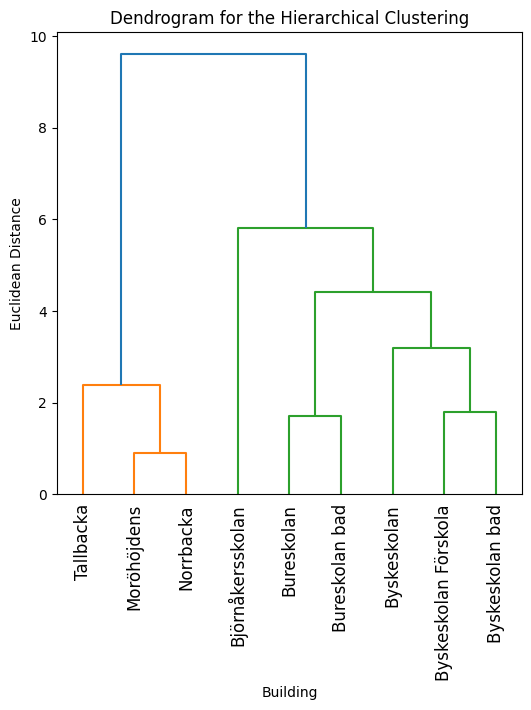

In [ ]:
# Generate the linkage matrix
Z = linkage(df_processed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(6, 6))
dendrogram(Z, labels=df.Building.values, leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogram for the Hierarchical Clustering")
plt.xlabel("Building")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
# Perform hierarchical clustering with the determined number of clusters
n_clusters = 2 #3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(df_processed)

# Display the resulting clusters
df[['Building', 'Cluster']].sort_values(by='Cluster')


,Building,Cluster
3,Byskeskolan,0
4,Bureskolan,0
5,Björnåkersskolan,0
6,Bureskolan bad,0
7,Byskeskolan Förskola,0
8,Byskeskolan bad,0
0,Tallbacka,1
1,Moröhöjdens,1
2,Norrbacka,1


In [ ]:
columns = preprocessor.get_feature_names_out()
df_processed_df = pd.DataFrame(df_processed, columns=columns, index=df.index)

# Add cluster labels to the processed data
df_processed_df['Cluster'] = df['Cluster']

# Initialize a dictionary to store the centroid of each cluster
centroids = {}

# Calculate the centroid for each cluster
for i in range(n_clusters):
    centroids[i] = df_processed_df[df_processed_df['Cluster'] == i].mean(axis=0)

# Initialize a dictionary to store the most representative building of each cluster
representatives = {}

# Find the most representative building for each cluster
for i in range(n_clusters):
    # Drop the 'Cluster' column when calculating distances
    cluster_data = df_processed_df[df_processed_df['Cluster'] == i].drop('Cluster', axis=1)
    centroid = centroids[i].drop('Cluster')
    
    # Calculate the Euclidean distance from each building in the cluster to the centroid
    distances = cluster_data.apply(lambda x: np.linalg.norm(x - centroid), axis=1)
    
    # Identify the index of the minimum distance
    min_dist_index = distances.idxmin()
    
    # Store the most representative building's name
    representatives[i] = df.loc[min_dist_index, 'Building']

# Display the most representative building for each cluster
for cluster, building in representatives.items():
    print(f"Most representative building for Cluster {cluster}: {building}")


Most representative building for Cluster 0: Bureskolan
Most representative building for Cluster 1: Norrbacka


## K-Means

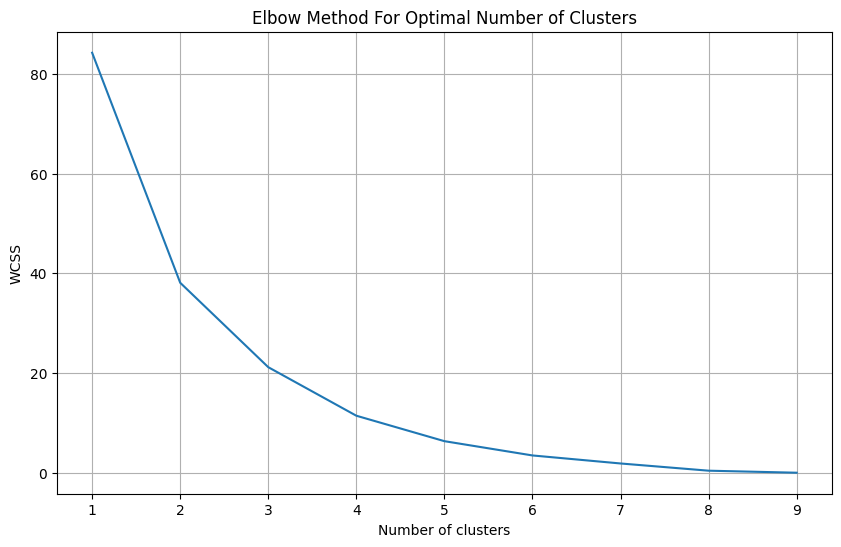

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_processed)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()


In [ ]:
# Perform K-means clustering with the chosen number of clusters
optimal_clusters = 2 #3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(df_processed)

# Display the resulting clusters along with the buildings
df[['Building', 'KMeans_Cluster']].sort_values(by='KMeans_Cluster')


,Building,KMeans_Cluster
3,Byskeskolan,0
4,Bureskolan,0
5,Björnåkersskolan,0
6,Bureskolan bad,0
7,Byskeskolan Förskola,0
8,Byskeskolan bad,0
0,Tallbacka,1
1,Moröhöjdens,1
2,Norrbacka,1


# Clustering Time series with DTW

In [ ]:
!pip install dtaidistance==2.3.11



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
pip install plotly


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.graph_objs as go

building_names = ['Björnåkerskolan_Fjv', 'Bureskolan_bad_Fjv', 'Bureskolan_Fjv', 'Byskeskolan_bad_Fjv', 'Byskeskolan_Fjv', 'Byskeskolan_förskola_Fjv', 'Moröhöjdens_Fjv', 'Norrbacka_Fjv', 'Tallbacka_Fjv']

# Create an interactive Plotly graph for each time series
time_series_consumption = [df['Consumption'] for df in [Björnåkerskolan_Fjv, Bureskolan_bad_Fjv, Bureskolan_Fjv, Byskeskolan_bad_Fjv, Byskeskolan_Fjv, Byskeskolan_förskola_Fjv, Moröhöjdens_Fjv, Norrbacka_Fjv, Tallbacka_Fjv]]

# Create an interactive Plotly graph for each time series
traces = []
for df, name in zip(time_series_consumption, building_names):
    traces.append(go.Scatter(
        x=df.index, 
        y=df, 
        mode='lines',
        name=name
    ))

layout = go.Layout(
    title='District Heating Consumption Time Series',
    xaxis=dict(title='Date'),
    yaxis=dict(title='District Heating Consumption'),  # Update this if you normalize
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

/tmp/ipykernel_205/3076800633.py:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



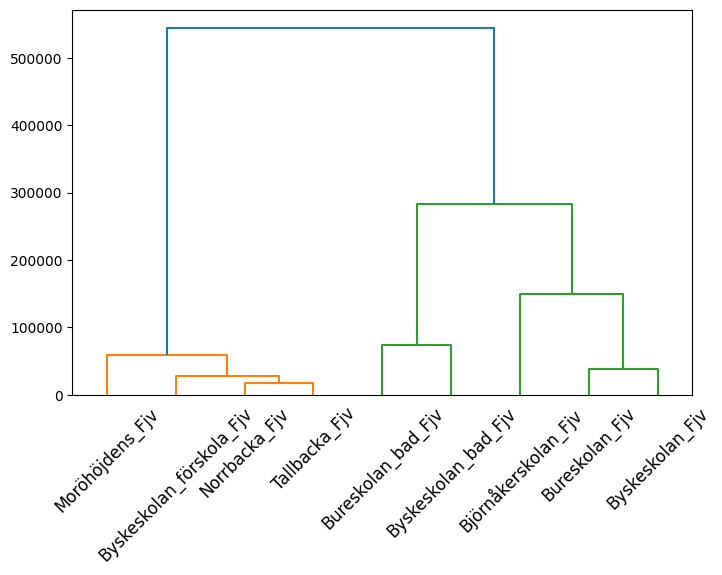

In [ ]:
from dtaidistance import dtw
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming time_series is a list of your time series after preprocessing
buildings = ['Björnåkerskolan_Fjv', 'Bureskolan_bad_Fjv', 'Bureskolan_Fjv', 'Byskeskolan_bad_Fjv', 'Byskeskolan_Fjv', 'Byskeskolan_förskola_Fjv', 'Moröhöjdens_Fjv', 'Norrbacka_Fjv', 'Tallbacka_Fjv']
time_series = [df['corrected_value'].to_numpy() for df in [Björnåkerskolan_Fjv, Bureskolan_bad_Fjv, Bureskolan_Fjv, Byskeskolan_bad_Fjv, Byskeskolan_Fjv, Byskeskolan_förskola_Fjv, Moröhöjdens_Fjv, Norrbacka_Fjv, Tallbacka_Fjv]]
distance_matrix = dtw.distance_matrix_fast(time_series)

# Use linkage to perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(Z, labels=buildings)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [ ]:
pip install tslearn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tslearn.clustering import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

n_clusters = 3

cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
silhouette_score(distance_matrix, cluster_labels, metric="dtw")

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



0.5843688066578306

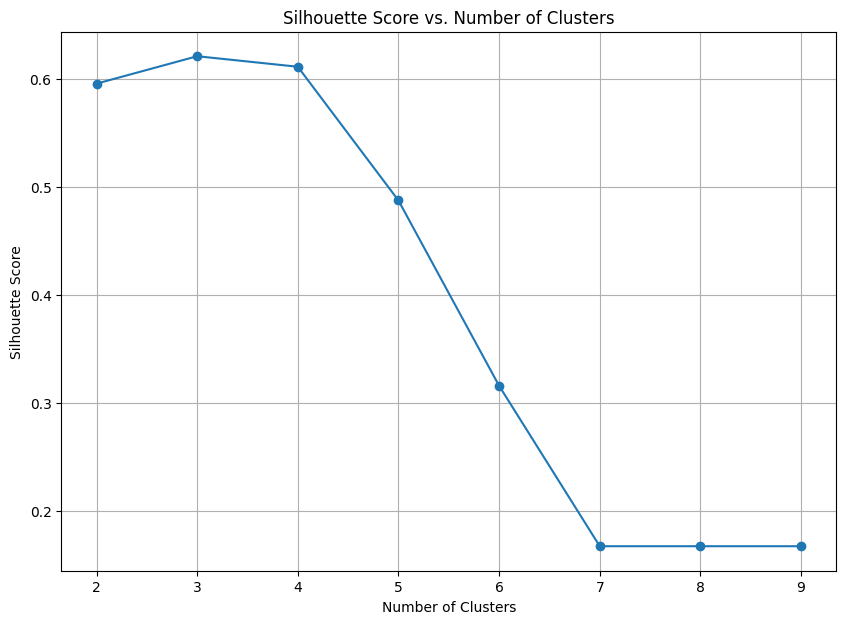

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.ticker as ticker

# Choose a maximum number of clusters to evaluate
max_clusters = 9
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in range(2, max_clusters + 1):
    # Perform clustering
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')

# Set the x-axis to only show integer values (whole number of clusters)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)  # Optional: add grid for better readability
plt.show()



In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(distance_matrix, cluster_labels,)

0.1140469527626655

In [ ]:
# Assuming 'building_names' contains the names of the buildings in the order they appear in 'time_series'
building_names = ['Björnåkerskolan_Fjv', 'Bureskolan_bad_Fjv', 'Bureskolan_Fjv', 'Byskeskolan_bad_Fjv', 'Byskeskolan_Fjv', 'Byskeskolan_förskola_Fjv', 'Moröhöjdens_Fjv', 'Norrbacka_Fjv', 'Tallbacka_Fjv']

# Use a threshold or number of clusters based on your Elbow curve analysis
number_of_clusters =  3 #2 # Around 2-4 according to elbow method
cluster_labels = fcluster(Z, number_of_clusters, criterion='maxclust')

# Initialize a dictionary to hold the names of buildings in each cluster
clusters = {i: [] for i in range(1, number_of_clusters + 1)}
for i, label in enumerate(cluster_labels):
    clusters[label].append(building_names[i])

# Calculate the lengths of each time series
time_series_lengths = [len(ts) for ts in time_series]

# Determine the most representative series in each cluster using normalized DTW distances
for cluster_number, building_list in clusters.items():
    print(f"Cluster {cluster_number} contains the following buildings: {building_list}")

    indices = [building_names.index(name) for name in building_list]
    if len(indices) == 1:
        print(f"The most representative building for Cluster {cluster_number} is {building_list[0]}")
        continue

    # Calculate normalized distances within the cluster
    normalized_distances = []
    for idx in indices:
        sum_distances = np.sum(distance_matrix[idx, indices])
        normalized_distance = sum_distances / time_series_lengths[idx]  # Normalizing by the length of the series
        normalized_distances.append(normalized_distance)

    # The series with the smallest normalized distance is the most representative
    most_representative_index = np.argmin(normalized_distances)
    most_representative_building = building_list[most_representative_index]
    
    print(f"The most representative building for Cluster {cluster_number} is {most_representative_building}")


Cluster 1 contains the following buildings: ['Byskeskolan_förskola_Fjv', 'Moröhöjdens_Fjv', 'Norrbacka_Fjv', 'Tallbacka_Fjv']
The most representative building for Cluster 1 is Byskeskolan_förskola_Fjv
Cluster 2 contains the following buildings: ['Bureskolan_bad_Fjv', 'Byskeskolan_bad_Fjv']
The most representative building for Cluster 2 is Bureskolan_bad_Fjv
Cluster 3 contains the following buildings: ['Björnåkerskolan_Fjv', 'Bureskolan_Fjv', 'Byskeskolan_Fjv']
The most representative building for Cluster 3 is Bureskolan_Fjv


In [ ]:
# Assuming 'building_names' contains the names of the buildings in the order they appear in 'time_series'
building_names = ['Björnåkerskolan_Fjv', 'Bureskolan_bad_Fjv', 'Bureskolan_Fjv', 'Byskeskolan_bad_Fjv', 'Byskeskolan_Fjv', 'Byskeskolan_förskola_Fjv', 'Moröhöjdens_Fjv', 'Norrbacka_Fjv', 'Tallbacka_Fjv']

# Use a threshold or number of clusters based on your Elbow curve analysis
number_of_clusters = 3  # Choose based on elbow method
cluster_labels = fcluster(Z, number_of_clusters, criterion='maxclust')

# Initialize a dictionary to hold the names of buildings in each cluster
clusters = {i: [] for i in range(1, number_of_clusters + 1)}
for i, label in enumerate(cluster_labels):
    clusters[label].append(building_names[i])

# Calculate the lengths of each time series
time_series_lengths = [len(ts) for ts in time_series]

# Calculate weights inversely proportional to the series lengths
max_length = max(time_series_lengths)
weights = [max_length / length for length in time_series_lengths]

# Determine the most representative series in each cluster and print normalized distances
for cluster_number, building_list in clusters.items():
    print(f"\nCluster {cluster_number} contains the following buildings: {building_list}")

    indices = [building_names.index(name) for name in building_list]
    if len(indices) == 1:
        print(f"The most representative (and only) building for Cluster {cluster_number} is {building_list[0]}")
        print(f"Normalized distance for {building_list[0]}: 0.0 (only building in the cluster)")
        continue

    normalized_distances = []
    for idx in indices:
        sum_distances = np.sum(distance_matrix[idx, indices])
        normalized_distance = sum_distances / time_series_lengths[idx]  # Normalizing by the length of the series
        normalized_distances.append(normalized_distance)

    most_representative_index = np.argmin(normalized_distances)
    most_representative_building = building_list[most_representative_index]
    
    print(f"The most representative building for Cluster {cluster_number} is {most_representative_building}")
    
    # Print normalized distances for each building
    for i, building in enumerate(building_list):
        print(f"Final normalized distance for {building}: {normalized_distances[i]}")



Cluster 1 contains the following buildings: ['Byskeskolan_förskola_Fjv', 'Moröhöjdens_Fjv', 'Norrbacka_Fjv', 'Tallbacka_Fjv']
The most representative building for Cluster 1 is Byskeskolan_förskola_Fjv
Final normalized distance for Byskeskolan_förskola_Fjv: 7.530617628466642
Final normalized distance for Moröhöjdens_Fjv: 14.2180815102415
Final normalized distance for Norrbacka_Fjv: 10.281026736182927
Final normalized distance for Tallbacka_Fjv: 13.474500857845646

Cluster 2 contains the following buildings: ['Bureskolan_bad_Fjv', 'Byskeskolan_bad_Fjv']
The most representative building for Cluster 2 is Bureskolan_bad_Fjv
Final normalized distance for Bureskolan_bad_Fjv: 6.1065798075401165
Final normalized distance for Byskeskolan_bad_Fjv: 6.240811128386973

Cluster 3 contains the following buildings: ['Björnåkerskolan_Fjv', 'Bureskolan_Fjv', 'Byskeskolan_Fjv']
The most representative building for Cluster 3 is Bureskolan_Fjv
Final normalized distance for Björnåkerskolan_Fjv: 21.987084686

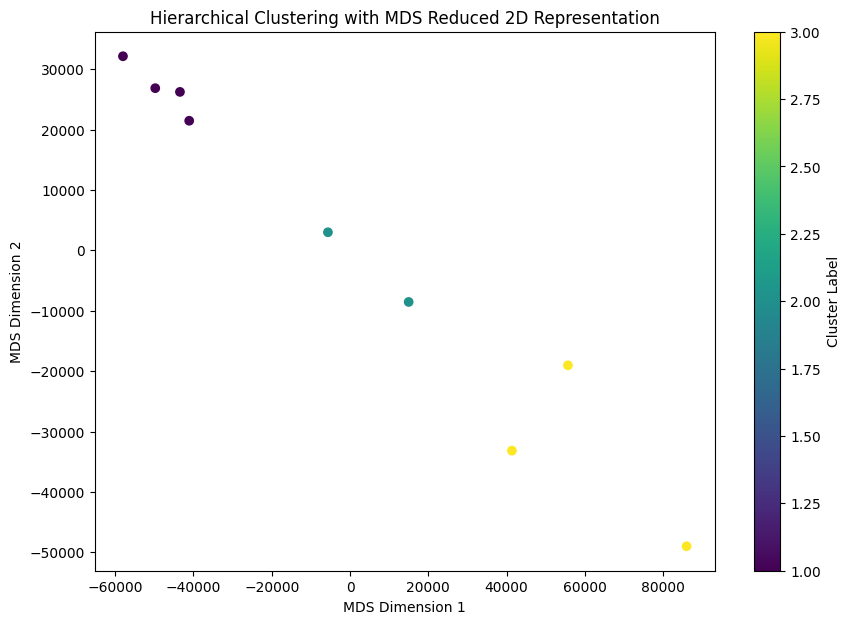

In [ ]:
from sklearn.manifold import MDS

# Multidimensional Scaling (MDS) for dimensionality reduction for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
time_series_reduced = mds.fit_transform(distance_matrix)

# Scatter plot of the two-dimensional data points with clusters
plt.figure(figsize=(10, 7))
plt.scatter(time_series_reduced[:, 0], time_series_reduced[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering with MDS Reduced 2D Representation')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
import plotly.graph_objs as go

# Convert the numpy distance matrix to a list of lists, which Plotly can accept
distance_matrix_list = distance_matrix.tolist()

# Create heatmap
fig = go.Figure(data=go.Heatmap(
                    z=distance_matrix_list,
                    x=building_names,
                    y=building_names,
                    #colorscale='Viridis',
                    hoverongaps = False))

# Update layout for a more readable heatmap
fig.update_layout(
    title='DTW Distance Matrix',
    xaxis=dict(title='Buildings'),
    yaxis=dict(title='Buildings'),
    autosize=False,
    width=680,
    height=680,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

# Show the plot
fig.show()


In [ ]:
import plotly.figure_factory as ff

# You'll create heatmaps for each cluster to visualize the DTW distances
# and identify the medoid visually.

for cluster_number, building_list in clusters.items():
    print(f"Visualizing Cluster {cluster_number} with buildings: {building_list}")
    
    # Get the indices of the buildings in this cluster
    indices = [building_names.index(name) for name in building_list]

    # If there's only one building, no need for a heatmap
    if len(indices) == 1:
        print(f"Only one building in Cluster {cluster_number}, so it's the medoid by default.")
        continue

    # Get the submatrix of distances for buildings in this cluster
    submatrix = distance_matrix[np.ix_(indices, indices)]
    
    # Calculate the average distance to other points in the cluster and find the medoid
    avg_distances = submatrix.mean(axis=1)
    most_representative_index = np.argmin(avg_distances)

    # The building with the smallest average distance is the most representative
    most_representative_building = building_list[most_representative_index]

    # Create a heatmap for the submatrix
    fig = ff.create_annotated_heatmap(
        z=submatrix,
        x=[building_list[i] for i in range(len(indices))],  # Building names for columns
        y=[building_list[i] for i in range(len(indices))],  # Building names for rows
        annotation_text=np.around(submatrix, decimals=2),
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout to add titles and adjust size if necessary
    fig.update_layout(
        title=f"DTW Distance Matrix for Cluster {cluster_number} - Medoid: {most_representative_building}",
        xaxis=dict(title='Buildings'),
        yaxis=dict(title='Buildings'),
        width=600,
        height=600
    )

    fig.show()


Visualizing Cluster 1 with buildings: ['Byskeskolan_förskola_Fjv', 'Moröhöjdens_Fjv', 'Norrbacka_Fjv', 'Tallbacka_Fjv']


Visualizing Cluster 2 with buildings: ['Bureskolan_bad_Fjv', 'Byskeskolan_bad_Fjv']


Visualizing Cluster 3 with buildings: ['Björnåkerskolan_Fjv', 'Bureskolan_Fjv', 'Byskeskolan_Fjv']


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75f8df25-ca83-430b-8bf0-875ff5982751' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>